In [ ]:
import json
import requests

newHeaders = {'Content-type': 'application/json', 'Accept': 'text/plain'}

response = requests.get('http://localhost:8000/predict/',
                         headers=newHeaders)

print("Status code: ", response.status_code)
print("Response contents: ", response.text)

In [1]:
import json
import requests
import os
import io
import numpy as np
import cv2
import cvlib as cv
from IPython.display import Image, display

Status code:  200


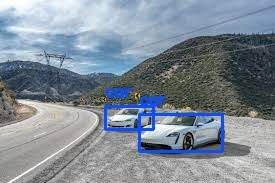

In [2]:
with open(os.getcwd()+"/images/car2.jpg", "rb") as image_file:
    files = {'file': image_file}
    r = requests.post('http://localhost:8000/predict?model=yolov3-tiny', files=files)
    print("Status code: ", r.status_code)
    image_stream = io.BytesIO(r.content)
    image_stream.seek(0)
    file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
    filename = "temp.jpeg"
    cv2.imwrite(f'images_with_boxes/{filename}', image)
    display(Image(f'images_with_boxes/{filename}'))